In [1]:
import sys
sys.path.append("..")

from libs.data_manipulation import *
from libs.dim_reduction import *
from libs.feature_generation import *
from libs.clustering import *
from libs.convex_hull import *
from libs.alpha_shape import *
from libs.weight_generator import *

/home/martin/.local/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.2.3) or chardet (None)/charset_normalizer (2.1.0) doesn't match a supported version!
  warnings.warn(


In [2]:
time_of_selected_moment = 42.24

In [3]:
england_df = compile_team_tracking_data("../data/H_EURO2024GERMANY","England")


FileNotFoundError: [Errno 2] No such file or directory: '../data/H_EURO2024GERMANY'

In [4]:
data_df = extract_one_match(england_df, 4)
original_df = data_df 

In [5]:
first_match = data_df[data_df["match_id"] == 1]
index_of_corner = first_match[first_match["Time [s]"].between(time_of_selected_moment-1, time_of_selected_moment+1)].index[0]

In [6]:
import pandas as pd
import numpy as np

def filter_by_ball_radius(data, index, radius):
    # Get the ball position at the specified index
    ref_ball_x = data.at[index, 'ball_x_team']
    ref_ball_y = data.at[index, 'ball_y_team']
    
    # Calculate the distance of each row's ball position from the reference position
    distances = np.sqrt((data['ball_x_team'] - ref_ball_x)**2 + (data['ball_y_team'] - ref_ball_y)**2)
    
    # Filter rows where the distance is less than or equal to the radius
    filtered_data = data[distances <= radius]
    
    return filtered_data


In [7]:
data_df = filter_by_ball_radius(data_df, index_of_corner, 5)

In [8]:
print(len(data_df))

5003


In [9]:
function_1 = lambda x : 200 - x
function_2 = lambda x : 1/x
function_3 = lambda x : np.exp((-x/40))

In [10]:
# Extract the clicked row as a dictionary (to simulate the format for a clicked situation)
clicked_row = data_df.iloc[index_of_corner].to_dict()

# Run both functions with the same weighting functions and compare results
control_results_original = most_similar_with_wasserstein(index_of_corner, data_df, lambda x:1, normalizing_factor=12)
control_results_from_row = most_similar_with_wasserstein_from_row(clicked_row, data_df, lambda x:1, normalizing_factor=12)

function_1_results_original = most_similar_with_wasserstein(index_of_corner, data_df, function_1, normalizing_factor=2200, max_weight=195)
function_1_results_from_row = most_similar_with_wasserstein_from_row(clicked_row, data_df, function_1, normalizing_factor=2200, max_weight=195)

function_2_results_original = most_similar_with_wasserstein(index_of_corner, data_df, function_2, max_weight=1)
function_2_results_from_row = most_similar_with_wasserstein_from_row(clicked_row, data_df, function_2, max_weight=1)

function_3_results_original = most_similar_with_wasserstein(index_of_corner, data_df, function_3, max_weight=1)
function_3_results_from_row = most_similar_with_wasserstein_from_row(clicked_row, data_df, function_3, max_weight=1)

# Print and compare the results
print("Control Original", control_results_original[:10])
print("Control From Row)", control_results_from_row[:10])
print("-------------------")
print("Function 1 Original", function_1_results_original[:10])
print("Function 1 From Row", function_1_results_from_row[:10])
print("-------------------")
print("Function 2 Original", function_2_results_original[:10])
print("Function 2 From Row", function_2_results_from_row[:10])
print("-------------------")
print("Function 3 Original", function_3_results_original[:10])
print("Function 3 From Row", function_3_results_from_row[:10])

        home_6_x   home_6_y   home_1_x  home_1_y  home_10_x  home_10_y  \
540   -37.290260  -2.787178 -50.764545 -1.079776  -4.526245  -1.828018   
1033  -32.727360  17.328987 -43.066631  0.523623  -8.191053 -12.775763   
1081  -32.186218  15.369570 -43.013371  0.566434  -7.459801 -13.612037   
17568 -25.659166   9.012510 -40.815754  4.207187  -4.841258   1.702055   
23003 -22.506197  -4.969710 -39.020309 -7.534316   2.404628  -4.911590   

       home_11_x  home_11_y   home_2_x   home_2_y  ...  home_24_x  home_24_y  \
540   -25.677553   5.612628 -32.465500 -19.529156  ...        NaN        NaN   
1033   -1.222537  24.914318 -18.485426 -24.229918  ...        NaN        NaN   
1081    0.662110  24.961201 -18.246439 -26.137337  ...        NaN        NaN   
17568   1.324650  28.230032 -12.639800 -21.451822  ...        NaN        NaN   
23003   8.065908  21.101599  -8.858491 -33.057400  ...        NaN        NaN   

       home_17_x  home_17_y  home_14_x  home_14_y  home_3_x  home_3_y  \
5

In [ ]:
rip_k_corner = ripley_k_by_indices(data_df, [index_of_corner])
rip_k_whole_match = ripley_k_by_indices(data_df.iloc[::48], data_df.iloc[::48].index.to_numpy())


AttributeError: 'dict' object has no attribute 'loc'

In [19]:
print("Ripley's K for the corner point:", rip_k_corner)
print("Ripley's K for the corner point (by row):", row_rip_k_corner)

Ripley's K for the corner point: [[   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.          118.01652893  118.01652893  354.04958678  354.04958678
   590.08264463  826.11570248  944.1322314  1062.14876033 1180.16528926
  1652.23140496 1888.26446281 2006.28099174 2124.29752066 2242.31404959
  2242.31404959 2360.33057851 2596.36363636 2596.36363636 2832.39669421
  2950.41322314 2950.41322314 3186.44628099 3304.46280992]]
Ripley's K for the corner point (by row): [[   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.          354.04958678  354.04958678  354.04958678  590.08264463
   590.08264463  708.09917355  944.1322314  1180.16528926 1534.21487603
  1652.23140496 1770.24793388 1770.24793388 1888.26446281 2124.29752066
  2360.33057851 2596.36363636 2832.39669421 2950.41322314 2950.41322314
  3304.46280992 3658.51239669 377

In [37]:
rip_k_control = ripley_k_by_indices(data_df, control_results_original[:10])
rip_k_function_1 = ripley_k_by_indices(data_df, function_1_results_original[:10])
rip_k_function_2 = ripley_k_by_indices(data_df, function_2_results_original[:10])
rip_k_function_3 = ripley_k_by_indices(data_df, function_3_results_original[:10])

row_k_control = ripley_k_by_indices(data_df, control_results_from_row[:10])
row_k_function_1 = ripley_k_by_indices(data_df, function_1_results_from_row[:10])
row_k_function_2 = ripley_k_by_indices(data_df, function_2_results_from_row[:10])
row_k_function_3 = ripley_k_by_indices(data_df, function_3_results_from_row[:10])



here
here
here
here
here
here


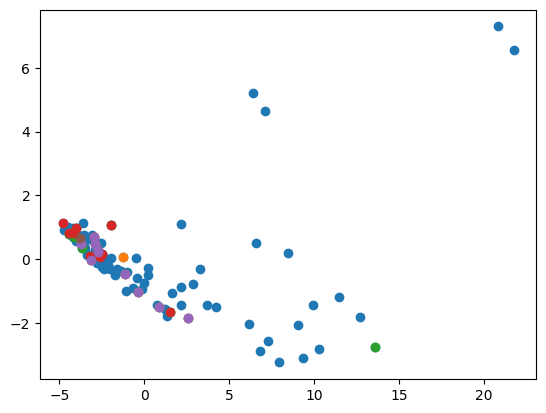

In [42]:
pca_obj = PCAObject(rip_k_whole_match)

components_match = pca_obj.transform(rip_k_whole_match)
components_corner = pca_obj.transform(rip_k_corner)
components_control = pca_obj.transform(rip_k_control)
components_func_1 = pca_obj.transform(rip_k_function_1)
components_func_2 = pca_obj.transform(rip_k_function_2)
components_func_3 = pca_obj.transform(rip_k_function_3)



plt.scatter(components_match[:,0],components_match[:,1])
plt.scatter(components_func_1[:,0], components_func_1[:,1])
plt.scatter(components_func_2[:,0], components_func_2[:,1])
plt.scatter(components_func_3[:,0], components_func_3[:,1])
plt.scatter(components_control[:,0],components_control[:,1])
plt.scatter(components_corner[:,0], components_corner[:,1])
plt.show()


In [43]:
row_components_match = pca_obj.transform(row_rip_k_whole_match)
row_components_corner = pca_obj.transform(row_rip_k_corner)
row_components_control = pca_obj.transform(row_k_control)
row_components_func_1 = pca_obj.transform(row_k_function_1)
row_components_func_2 = pca_obj.transform(row_k_function_2)
row_components_func_3 = pca_obj.transform(row_k_function_3)


here
here
here
here
here
here


In [44]:
generate_folder("function_1_top_10")
generate_folder("function_2_top_10")
generate_folder("function_3_top_10")
generate_folder("control_top_10")
generate_folder("target_situation")
k=10

generate_pitches_from_start_indices(function_1_results_original[:k], original_df, "function_1_top_10",1, 1)
generate_pitches_from_start_indices(function_2_results_original[:k], original_df, "function_2_top_10",1, 1)
generate_pitches_from_start_indices(function_3_results_original[:k], original_df, "function_3_top_10",1, 1)
generate_pitches_from_start_indices(control_results_original[:k], original_df,"control_top_10",1,1)
generate_pitches_from_start_indices([index_of_corner], original_df, "target_situation",1, 1)




generate_folder("function_1_top_10_row")
generate_folder("function_2_top_10_row")
generate_folder("function_3_top_10_row")
generate_folder("control_top_10_row")
generate_folder("target_situation_row")

generate_pitches_from_start_indices(function_1_results_from_row[:k], original_df, "function_1_top_10_row",1, 1)
generate_pitches_from_start_indices(function_2_results_from_row[:k], original_df, "function_2_top_10_row",1, 1)
generate_pitches_from_start_indices(function_3_results_from_row[:k], original_df, "function_3_top_10_row",1, 1)
generate_pitches_from_start_indices(control_results_from_row[:k], original_df,"control_top_10_row",1,1)
generate_pitches_from_start_indices([index_of_corner], original_df, "target_situation_row",1, 1)


Folder 'function_1_top_10' has been removed successfully.
Folder 'function_2_top_10' has been removed successfully.
Folder 'function_3_top_10' has been removed successfully.
Folder 'control_top_10' has been removed successfully.
Folder 'target_situation' has been removed successfully.
Folder 'function_1_top_10_row' does not exist.
Folder 'function_2_top_10_row' does not exist.
Folder 'function_3_top_10_row' does not exist.
Folder 'control_top_10_row' does not exist.
Folder 'target_situation_row' does not exist.
